# Test `regplot`

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

import pygrutils.regplot as gr

## Basic usage

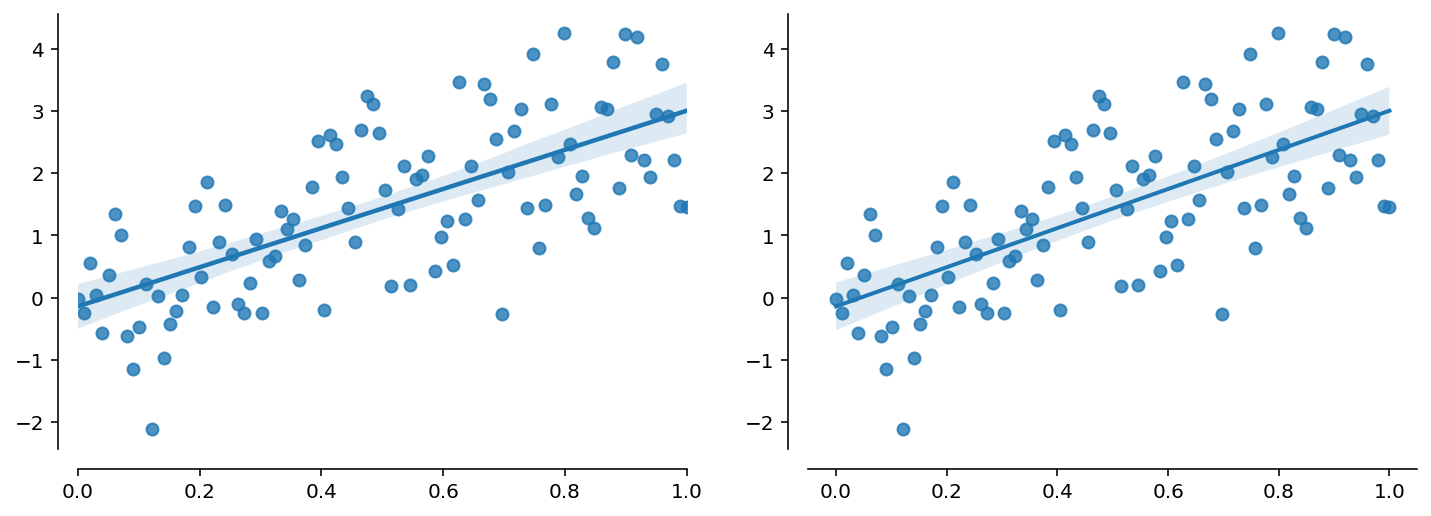

In [2]:
n = 100
alpha = 3.0
beta = -0.15
sigma = 1.0

rng = np.random.default_rng(0)
x = np.linspace(0, 1, n)
y = alpha * x + beta + sigma * rng.normal(size=n)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.regplot(x=x, y=y, ax=ax1)
res = gr.regplot(x=x, y=y, ax=ax2)

sns.despine(offset=10, ax=ax1)
sns.despine(offset=10, ax=ax2)